# 데이터

In [ ]:
from PIL import Image
import os, glob

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/e1_rock_scissor_paper_classifier/images/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("가위 이미지 resize 완료!")

In [ ]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/e1_rock_scissor_paper_classifier/images/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("바위 이미지 resize 완료!")

In [ ]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/e1_rock_scissor_paper_classifier/images/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.png")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"PNG")

print("보 이미지 resize 완료!")

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2520   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("전체 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/e1_rock_scissor_paper_classifier/images/"
x, y = load_data(image_dir_path)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

전체 이미지 개수는 2520 입니다.
x_train shape: (2016, 28, 28, 3)
y_train shape: (2016,)
x_test shape: (504, 28, 28, 3)
y_test shape: (504,)


라벨:  1


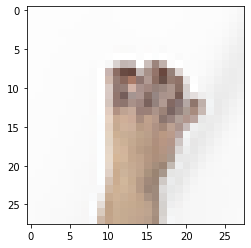

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 모델

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=16
n_channel_2=32
n_dense=400
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               320400    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

# 학습

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
63/63 [==============================] - 0s 2ms/step - loss: 12.6776 - accuracy: 0.6508
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9891
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 4.5624e-04 - accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 2.1833e-04 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 1.3039e-04 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 9.3226e-05 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 7.0518e-05 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 5.3328e-05 - accuracy: 1

# 테스트

In [10]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

16/16 - 1s - loss: 1.4152e-04 - accuracy: 1.0000
test_loss: 0.0001415186416124925 
test_accuracy: 1.0
